In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Load and prepare data
df = pd.read_csv('Wholesale customers data.csv')
X = df.iloc[:, 2:]  # Select spending categories: Fresh to Delicassen

In [3]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Determining optimal clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

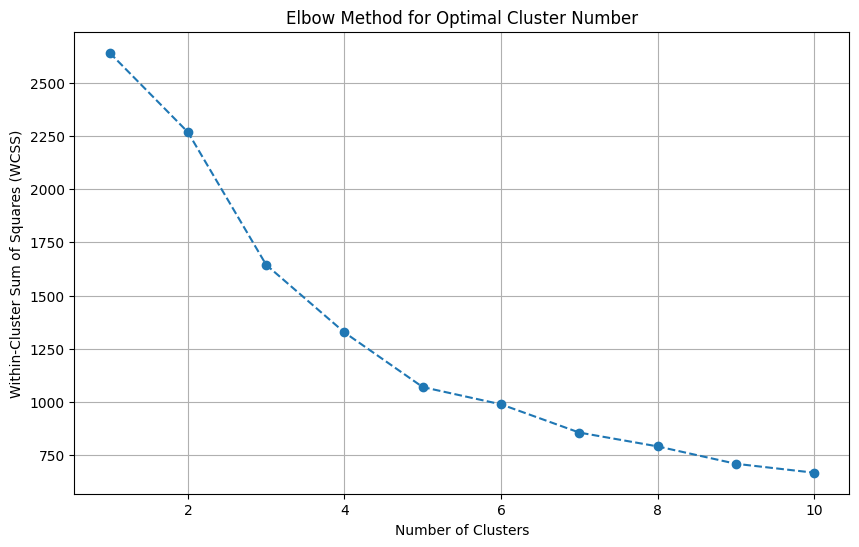

In [5]:
# Plotting elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

In [6]:
# Apply K-means with n_cluster 4
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [7]:
# Adding clusters to original data
df['Cluster'] = clusters

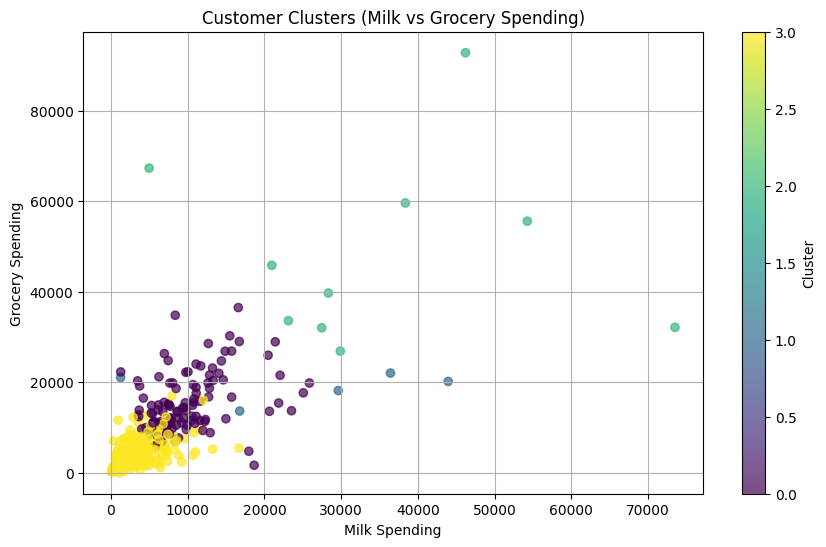

In [8]:
# Visualize clusters using two most significant features
plt.figure(figsize=(10, 6))
plt.scatter(X['Milk'], X['Grocery'], c=clusters, cmap='viridis', alpha=0.7)
plt.title('Customer Clusters (Milk vs Grocery Spending)')
plt.xlabel('Milk Spending')
plt.ylabel('Grocery Spending')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [9]:
# Display cluster characteristics
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_profile = pd.DataFrame(cluster_centers, columns=X.columns)
print("Cluster Spending Profiles:")
print(cluster_profile.round())


Cluster Spending Profiles:
     Fresh     Milk  Grocery   Frozen  Detergents_Paper  Delicassen
0   5475.0  10194.0  15588.0   1464.0            6735.0      1642.0
1  40137.0  19452.0  15026.0  23714.0            2374.0     15735.0
2  15965.0  34708.0  48537.0   3055.0           24875.0      2943.0
3  13512.0   3044.0   3850.0   3170.0             855.0      1122.0


In [10]:
# Show cluster distribution
print("\nCustomer Distribution:")
print(df['Cluster'].value_counts().sort_index())


Customer Distribution:
Cluster
0    109
1      7
2     10
3    314
Name: count, dtype: int64


In [11]:
# Function for interactive prediction
def predict_cluster():
    print("\nEnter customer spending details (in USD):")
    fresh = float(input("Fresh products spending: "))
    milk = float(input("Milk spending: "))
    grocery = float(input("Grocery spending: "))
    frozen = float(input("Frozen products spending: "))
    detergents = float(input("Detergents & Paper spending: "))
    delicassen = float(input("Delicassen spending: "))
    
    # input array
    new_data = np.array([[fresh, milk, grocery, frozen, detergents, delicassen]])
    
    # Scale the input
    scaled_data = scaler.transform(new_data)
    
    # Predict cluster
    predicted_cluster = kmeans.predict(scaled_data)[0]
    
    print(f"\nPredicted Cluster: {predicted_cluster}")
    print("\nCluster Profile:")
    print(cluster_profile.round().iloc[predicted_cluster])

In [ ]:
# Run
predict_cluster()


Enter customer spending details (in USD):
